### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

### Read in the csv files and remove duplicates

In [2]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful iso8859_6
successful cp850
successful cp949
successful cp037
successful cp858
successful mac_latin2
successful iso8859_3
successful iso8859_10
successful big5hkscs
successful iso8859_11
successful mac_iceland
successful latin_1
successful cp1253
successful iso8859_16
successful cp437
successful cp1257
successful koi8_r
successful cp1254
successful iso8859_5
successful cp866
successful cp860
successful kz1048
successful iso8859_14
successful utf_16_le
successful iso8859_13
successful iso8859_2
successful iso8859_7
successful cp869
successful mac_cyrillic
successful cp1026
successful mac_roman
successful cp864
successful cp1251
successful iso8859_4
successful ptcp154
successful cp273
successful cp863
successful cp1250
successful mac_turkish
successful iso8859_8
successful mac_greek
successful cp862
successful cp932
successful cp855
successful cp1252
successful cp775
successful cp1125
successful gb18030
successful cp500
successful cp1258
successful cp1256
successful iso8859_15


In [3]:
# Read in the crime.csv file and use the timestamp as a datetime index
crime = pd.read_csv("crime.csv", encoding="ISO-8859-11")

In [4]:
crime.head(50) # Quick check on how the dataset looks like

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [5]:
crime.shape       # Checking the shape of the data. It has 319,073 rows and 17 columns

(319073, 17)

In [6]:
crime.duplicated().sum() # Counting the duplicate rows

23

In [7]:
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [8]:
crime.shape # Checking the shape again to see if dropping the duplicate rows worked

(319050, 17)

### Explore the dataset

In [9]:
crime.head() # Quick check of the beginning of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [10]:
crime.tail() # Quick check of the end of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [11]:
crime.info() # Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [12]:
crime['OCCURRED_ON_DATE']

0         2018-09-02 13:00:00
1         2018-08-21 00:00:00
2         2018-09-03 19:27:00
3         2018-09-03 21:16:00
4         2018-09-03 21:05:00
                 ...         
319068    2016-06-05 17:25:00
319069    2015-07-09 13:38:00
319070    2015-07-09 13:38:00
319071    2016-05-31 19:35:00
319072    2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 319050, dtype: object

In [13]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [14]:
# Check if it worked
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [15]:
# easily extract datetime information frome the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [16]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [17]:
crime.OCCURRED_ON_DATE.dt.weekday

0         6
1         1
2         0
3         0
4         0
         ..
319068    6
319069    3
319070    3
319071    1
319072    0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [18]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [19]:
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [20]:
crime.describe() # summary information on the numeric columns

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [21]:
crime.describe(include='object') # summary information on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [22]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [23]:
# Checking for columns with missing values
crime.columns[np.sum(crime.isnull()) != 0]


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [24]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [25]:
# Task 0 
# Fill missing value

# fill non shooting case with N
crime['SHOOTING'].fillna('N', inplace=True)

# fill missing UCR Part with Other
crime['UCR_PART'].fillna('Other', inplace=True)

# fill both lat and long with 0
crime['Lat'].fillna(0, inplace=True)
crime['Long'].fillna(0, inplace=True)

In [26]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 2 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18179 unique values
Long has 18179 unique values
Location has 18194 unique values


### Let's answer some questions

In [27]:
# What are the most common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [28]:
crime.OFFENSE_CODE_GROUP.value_counts()[:]

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [29]:
crime.shape[0]

319050

In [30]:
37132/319050

0.11638301206707413

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

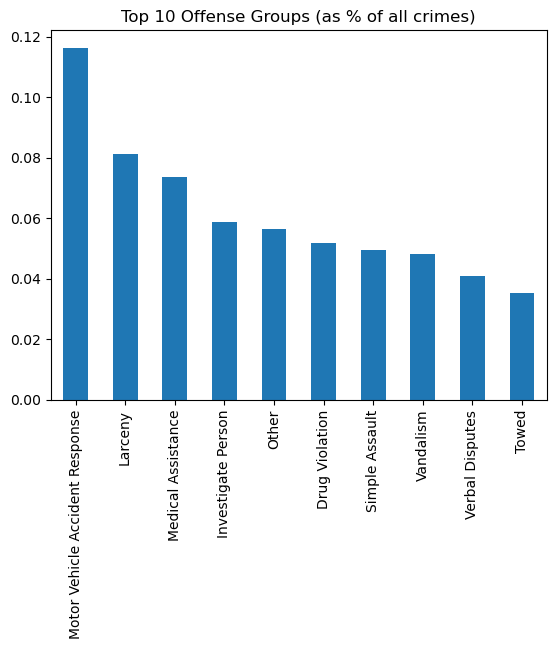

In [31]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_vals / crime.shape[0])

# Creating a bar chart of the Top 10 offense groups
(offense_group_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Groups (as % of all crimes)');

In [32]:
# What are the least common offense groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]


Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

In [33]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [34]:
# Question 1 - What are the most common offense descriptions?
# Hint - Use value_counts() to print out the values

crime.OFFENSE_DESCRIPTION.value_counts().sort_values(ascending=False)[:10]

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: OFFENSE_DESCRIPTION, dtype: int64

In [35]:
crime.shape


(319050, 17)

SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: OFFENSE_DESCRIPTION, dtype: float64

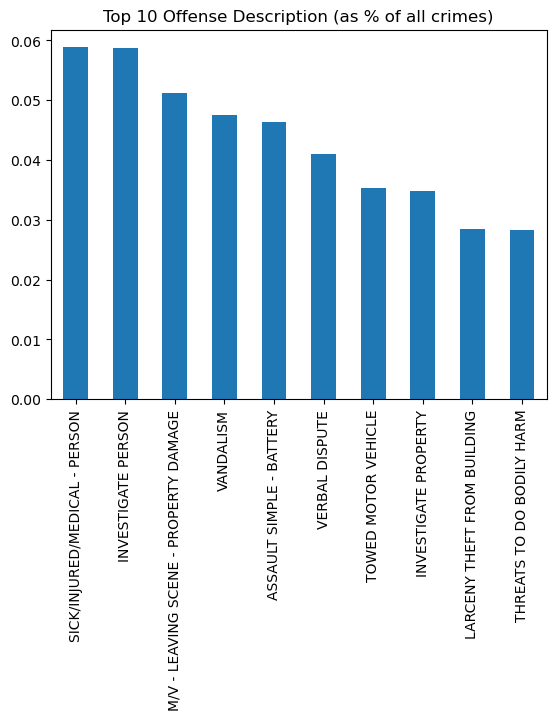

In [36]:
# Question 2 - Now try and create a bar chart of the Top 10 Offense Descriptions as a % of total crimes

offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])

# Creating a bar chart of the Top 10 offense groups
(offense_description_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Description (as % of all crimes)');

In [37]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

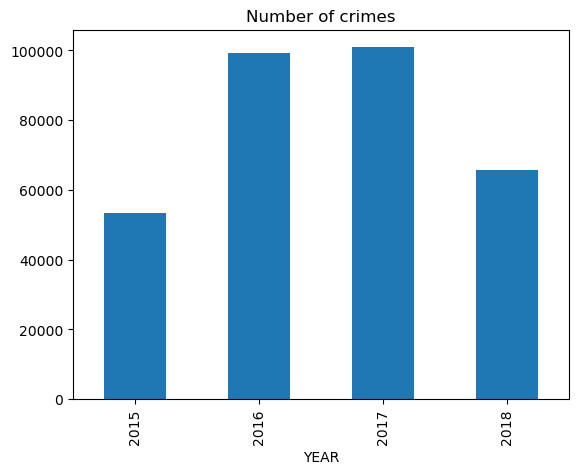

In [38]:
# In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

'\nSQL Version\nSELECT DAY_OF_WEEK, COUNT(INCIDENT_NUMBER)\nFROM crime \nGROUP BY DAY_OF_WEEK\n'

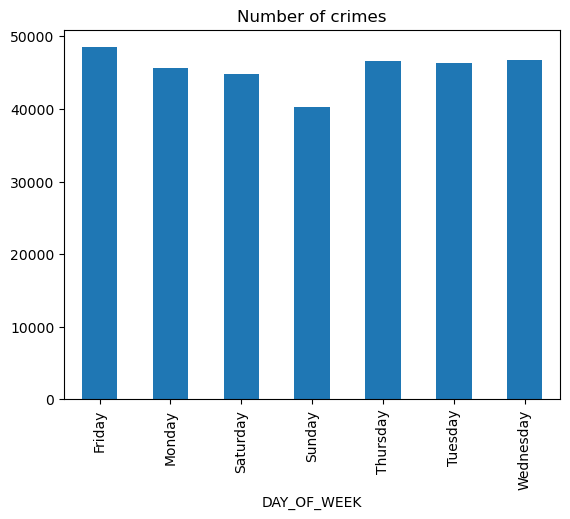

In [39]:
# Question 3 - Are there more crimes committed on specific days?

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER']

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

"""
SQL Version
SELECT DAY_OF_WEEK, COUNT(INCIDENT_NUMBER)
FROM crime 
GROUP BY DAY_OF_WEEK
"""




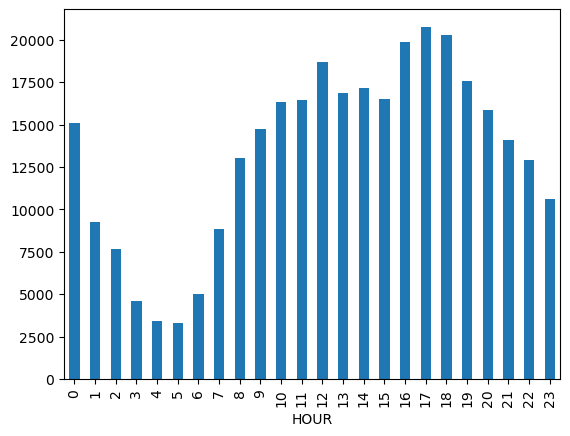

In [40]:
# Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

In [41]:
# On what days and during which hours are the most crimes committed?
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER']

HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
      Sunday         2400
      Thursday       2039
                     ... 
23    Saturday       1951
      Sunday         1380
      Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

In [42]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [43]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [44]:
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

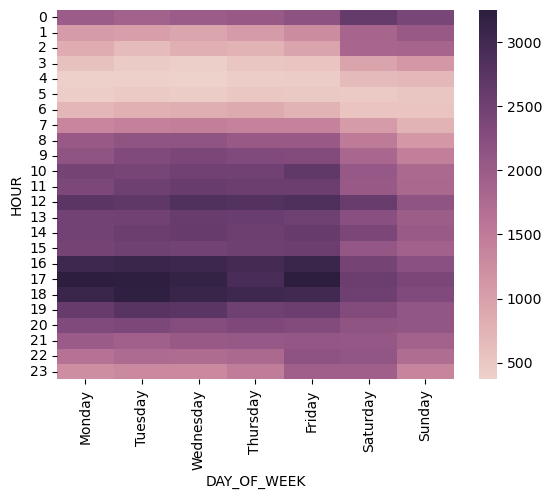

In [45]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));

In [46]:
# if the value is less than the average crime per month, highlight the value in blue

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [47]:
# Use apply to highlight the maximum in a column in darkgreen

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [48]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [49]:
# Question 4 - In which districts were the most crimes commmitted on yearly basis? 
# Feel free to use functions, tables and other visuals.

avg_crime = crime.groupby(['YEAR', 'DISTRICT']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'DISTRICT']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)

The average number of crimes is 6610.104166666667


In [50]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [51]:
# Homework 1
#Transfomration 
#Task 1
#You need to add actual address using location columns 

# Tips:
def get_address_from_lat_lng(latitude, longitude):
    geolocator = Nominatim(user_agent="reverse_geocoding")
    try:
        location = geolocator.reverse((latitude, longitude), exactly_one=True)
    except GeocoderTimedOut:
        pass
    
    if location:
        return location.address
    else:
        return None

# Example data in a Pandas DataFrame
data = {
    "Latitude": [37.7749, 34.0522, 40.7128, 0],
    "Longitude": [-122.4194, -118.2437, -74.0060, 0]
}

df = pd.DataFrame(data)

# Apply the address retrieval function to each row in the DataFrame
df["Address"] = df.apply(lambda row: get_address_from_lat_lng(row["Latitude"], row["Longitude"]), axis=1)

print(df)

   Latitude  Longitude                                            Address
0   37.7749  -122.4194  South Van Ness Avenue, Hayes Valley, San Franc...
1   34.0522  -118.2437  Los Angeles Police Department Headquarters, Ha...
2   40.7128   -74.0060  New York City Hall, 260, Broadway, Lower Manha...
3    0.0000     0.0000                                          Soul Buoy


In [52]:
# This will take about 15 hours.

# lat_long = crime[['Lat', 'Long']]

# crime['Address'] = lat_long.apply(lambda row: get_address_from_lat_lng(row["Lat"], row["Long"]), axis=1)

In [53]:
crime['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [54]:
# Task 2 
# Using the data from FBI to find out the offense score for all the offense type you can find.

#https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/docApi

# Identify the date range in crime dataset
# Text manipulation: convert all offense type to lower case 
# Extract data from FBI APIs 
# Fuzz matching https://stackoverflow.com/questions/10383044/fuzzy-string-comparison


import requests


url = "https://api.usa.gov/crime/fbi/cde/estimate/national/motor-vehicle-theft"
params = {
    "from": "2015",
    "to": "2018",
    "API_KEY": "iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    print("Response data:")
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")


Response data:
{'results': {'United States Motor Vehicle Theft': {'2015': 222.2, '2016': 237.3, '2017': 237.7, '2018': 230.2}}}


In [160]:
offense_types = ['motor-vehicle-theft', 'aggravated-assault', 'violent-crime', 'robbery', 'arson', 'human-trafficing', 'rape-legacy', 
                'homicide', 'burglary', 'larceny', 'property-crime']

url = "https://api.usa.gov/crime/fbi/cde/estimate/national/"
params = {
    "from": "2015",
    "to": "2018",
    "API_KEY": "iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
}

FBI_data = {
    'OFFENSE': [],
    'YEAR': [],
    'ESTIMATE': []
}

# Loop through each possible offense from FBI
# The data is being stored in FBI_data
for offense_type in offense_types:
    response = requests.get(url+offense_type, params=params)
    if response.status_code == 200:
        data = response.json()
        print("Response data:")
        print(data)
        if data['results'] is None:
            continue

        key = 'United States '
        offense_str = offense_type.replace('-', ' ').title()
        key += offense_str

        for year in range(2015, 2019):
            FBI_data['OFFENSE'].append(offense_str)
            FBI_data['YEAR'].append(year)
            FBI_data['ESTIMATE'].append(data['results'][key][str(year)])
        
    else:
        print(f"Request failed with status code: {response.status_code}")

FBI = pd.DataFrame(FBI_data)

Response data:
{'results': {'United States Motor Vehicle Theft': {'2015': 222.2, '2016': 237.3, '2017': 237.7, '2018': 230.2}}}
Response data:
{'results': {'United States Aggravated Assault': {'2015': 238.1, '2016': 248.3, '2017': 249.2, '2018': 248.2}}}
Response data:
{'results': {'United States Violent Crime': {'2015': 373.7, '2016': 397.5, '2017': 394.9, '2018': 383.4}}}
Response data:
{'results': {'United States Robbery': {'2015': 102.2, '2016': 102.9, '2017': 98.6, '2018': 86.1}}}
Response data:
{'results': {'United States Arson': {'2015': 13.8, '2016': 14.2, '2017': 13.2, '2018': 12.1}}}
Response data:
{'results': None}
Response data:
{'results': {'United States Rape Legacy': {'2015': 28.4, '2016': 30, '2017': None, '2018': None}}}
Response data:
{'results': {'United States Homicide': {'2015': 4.9, '2016': 5.4, '2017': 5.3, '2018': 5}}}
Response data:
{'results': {'United States Burglary': {'2015': 494.7, '2016': 468.9, '2017': 429.7, '2018': 378}}}
Response data:
{'results': {'U

In [66]:
FBI.head()

,OFFENSE,YEAR,ESTIMATE
0,Motor Vehicle Theft,2015,222.2
1,Motor Vehicle Theft,2016,237.3
2,Motor Vehicle Theft,2017,237.7
3,Motor Vehicle Theft,2018,230.2
4,Aggravated Assault,2015,238.1


In [57]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [183]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# process.extractOne("Liquor Violation", FBI['OFFENSE'].unique())

def fuzzy_merge(name, choices, threshold=80):
    res = process.extractOne(name, choices, score_cutoff=threshold)
    return 'Other' if not res else res[0]

offenses = {
    'OFFENSE_CODE_GROUP': crime['OFFENSE_CODE_GROUP'].unique()
}

offenses = pd.DataFrame(offenses)
offenses['OFFENSE'] = offenses['OFFENSE_CODE_GROUP'].apply(lambda x: fuzzy_merge(x, FBI['OFFENSE']))

crime_new = crime.merge(offenses, on='OFFENSE_CODE_GROUP')

offenses

,OFFENSE_CODE_GROUP,OFFENSE
0,Larceny,Larceny
1,Vandalism,Other
2,Towed,Other
3,Investigate Property,Other
4,Motor Vehicle Accident Response,Motor Vehicle Theft
...,...,...
62,Gambling,Other
63,INVESTIGATE PERSON,Other
64,HUMAN TRAFFICKING,Other
65,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Other


In [186]:
len(offenses.loc[offenses['OFFENSE'] != 'Other']) / 67

0.208955223880597

In [162]:
crime_new = crime_new.merge(FBI, how='left', on=['OFFENSE', 'YEAR'])
crime_new

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE,ESTIMATE
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Larceny,1601.6
1,I182070892,613,Larceny,LARCENY SHOPLIFTING,B2,276,N,2018-09-03 17:54:00,2018,9,Monday,17,Part One,SHAWMUT AVE,42.333183,-71.083076,"(42.33318299, -71.08307607)",Larceny,1601.6
2,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,N,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)",Larceny,1601.6
3,I182070874,617,Larceny,LARCENY THEFT FROM BUILDING,A1,102,N,2018-09-03 16:00:00,2018,9,Monday,16,Part One,WINTER ST,42.356024,-71.061776,"(42.35602373, -71.06177615)",Larceny,1601.6
4,I182070868,616,Larceny,LARCENY THEFT OF BICYCLE,D14,790,N,2018-09-03 06:15:00,2018,9,Monday,6,Part One,CHESTNUT HILL AVE,42.335400,-71.150257,"(42.33539970, -71.15025675)",Larceny,1601.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319045,I162078853,1610,HUMAN TRAFFICKING,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,D14,816,N,2016-09-26 16:48:00,2016,9,Monday,16,Other,HASKELL ST,42.359236,-71.128540,"(42.35923564, -71.12854039)",Other,NaN
319046,I172027969,1620,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,E5,691,N,2017-04-10 20:00:00,2017,4,Monday,20,Other,CENTRE ST,42.287094,-71.148221,"(42.28709355, -71.14822128)",Other,NaN
319047,I162066750,1620,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,B3,429,N,2016-08-18 06:37:00,2016,8,Thursday,6,Other,WILDWOOD ST,42.283295,-71.088241,"(42.28329468, -71.08824065)",Other,NaN
319048,I130204032-00,527,Burglary - No Property Taken,B&E RESIDENCE DAY - NO PROP TAKEN,E18,495,N,2016-01-12 14:45:00,2016,1,Tuesday,14,Other,AMERICAN LEGION HWY,42.277272,-71.115730,"(42.27727177, -71.11572996)",Burglary,468.9


In [58]:
# Task 3 
# Create a schema for this final data 

""" Sample 
CREATE TABLE IF NOT EXISTS crime ( 

INCIDENT_NUMBER VARCHAR(100),
OFFENSE_CODE INT,
OFFENSE_CODE_GROUP VARCHAR(100),
OFFENSE_DESCRIPTION VARCHAR(100),
DISTRICT VARCHAR(5),
REPORTING_AREA VARCHAR(5),
SHOOTING VARCHAR(2),
OCCURRED_ON_DATE DATE,
YEAR INT,
MONTH INT,
DAY_OF_WEEK VARCHAR(10),
HOUR INT,
UCR_PART VARCHAR(15),
STREET VARCHAR(100),
Lat FLOAT,
Long FLOAT,
Location VARCHAR(100),
FBI_OFFENSE_SCORE FLOAT

   )
"""
# ADDRESS VARCHAR(255) is not ready

# current columns 
# address 
# FBI offense score 



' Sample \nCREATE TABLE Data ( \n\nINCIDENT_NUMBER VARCHAR(255),\n   )\n'

In [182]:
# Task 4
# Load this data into Amazon AWS redshift 
# Create AWS account 
# In IAM create a new user for data loading 
# Give access to your new user redshift https://docs.aws.amazon.com/redshift/latest/mgmt/redshift-iam-authentication-access-control.html
# Create table in amazon redshift (1)create table directly in amazon redshift (2)via python 
# Load data to reshift 

# https://www.youtube.com/watch?v=AKIS0mF2ikU
import psycopg2

# Configuration

RS_host = 'your host'
RS_port = 'your port'
RS_database = 'your database'
RS_user = 'your username'
RS_password = 'your password'

conn = psycopg2.connect(
    host = RS_host,
    port = RS_port,
    dbname = RS_database,
    user = RS_user,
    password = RS_password
)

cursor = conn.cursor()

create_table = '''CREATE TABLE IF NOT EXISTS crime ( 
                INCIDENT_NUMBER VARCHAR(100),
                OFFENSE_CODE INT,
                OFFENSE_CODE_GROUP VARCHAR(100),
                OFFENSE_DESCRIPTION VARCHAR(100),
                DISTRICT VARCHAR(5),
                REPORTING_AREA VARCHAR(5),
                SHOOTING VARCHAR(2),
                OCCURRED_ON_DATE TIMESTAMP,
                YEAR INT,
                MONTH INT,
                DAY_OF_WEEK VARCHAR(10),
                HOUR INT,
                UCR_PART VARCHAR(15),
                STREET VARCHAR(100),
                Lat FLOAT,
                Long FLOAT,
                Location VARCHAR(100),
                OFFENSE VARCHAR(20),
                FBI_OFFENSE_SCORE FLOAT,
                PRIMARY KEY (INCIDENT_NUMBER, OFFENSE_CODE)
                )'''

cursor.execute(create_table)

add_crime = '''INSERT INTO crime
            (INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA
            , SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location,
            OFFENSE, FBI_OFFENSE_SCORE) values
            (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            '''

# ON CONFLICT (INCIDENT_NUMBER, OFFENSE_CODE) DO UPDATE
#             SET OFFENSE_CODE_GROUP = EXCLUDED.OFFENSE_CODE_GROUP,
#             OFFENSE_DESCRIPTION = EXCLUDED.OFFENSE_DESCRIPTION,
#             DISTRICT = EXCLUDED.DISTRICT,
#             REPORTING_AREA = EXCLUDED.REPORTING_AREA,
#             SHOOTING = EXCLUDED.SHOOTING,
#             OCCURRED_ON_DATE = EXCLUDED.OCCURRED_ON_DATE,
#             YEAR = EXCLUDED.YEAR,
#             MONTH = EXCLUDED.MONTH,
#             DAY_OF_WEEK = EXCLUDED.DAY_OF_WEEK,
#             HOUR = EXCLUDED.HOUR,
#             UCR_PART = EXCLUDED.UCR_PART,
#             STREET = EXCLUDED.STREET,
#             Lat = EXCLUDED.Lat,
#             Long = EXCLUDED.Long,
#             Location = EXCLUDED.Location,
#             FBI_OFFENSE_SCORE = EXCLUDED.FBI_OFFENSE_SCORE

# x = crime_new.iloc[0]
# print(x)
# x.loc['OFFENSE_CODE'], x.loc['YEAR'], x.loc["MONTH"], x.loc['HOUR'] = int(x[1]), int(x[8]), int(x[9]), int(x[11])

crime_new.iloc[0, 1], crime_new.iloc[0, 8], crime_new.iloc[0, 9], crime_new.iloc[0, 11] = \
            int(crime_new.iloc[0, 1]), int(crime_new.iloc[0, 8]), int(crime_new.iloc[0, 9]), int(crime_new.iloc[0, 11])

cursor.execute(add_crime, tuple(x))

# Task 5 Quicksight Dashboard 
# Task 6 Document everything 

conn.commit()
conn.close()